## TASK 1

### Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora, models
from collections import Counter
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gagur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gagur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Loading dataset

In [5]:
df = pd.read_csv('../data/raw_analyst_ratings.csv', parse_dates=['date'])

### Distribution of headline/article lengths

In [6]:
df['headline_length'] = df['headline'].str.len()

print(df['headline_length'].describe())


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


### Count articles per publisher

In [7]:
publisher_counts = df['publisher'].value_counts()
print(publisher_counts)


publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


### Trends in publication dates (daily counts)

In [8]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])
df['date_only'] = df['date'].dt.date
daily_counts = df.groupby('date_only').size()
print(daily_counts)


date_only
2011-04-27      1
2011-04-28      2
2011-04-29      2
2011-04-30      1
2011-05-01      1
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Length: 2528, dtype: int64


### Ploting Trends in publication dates

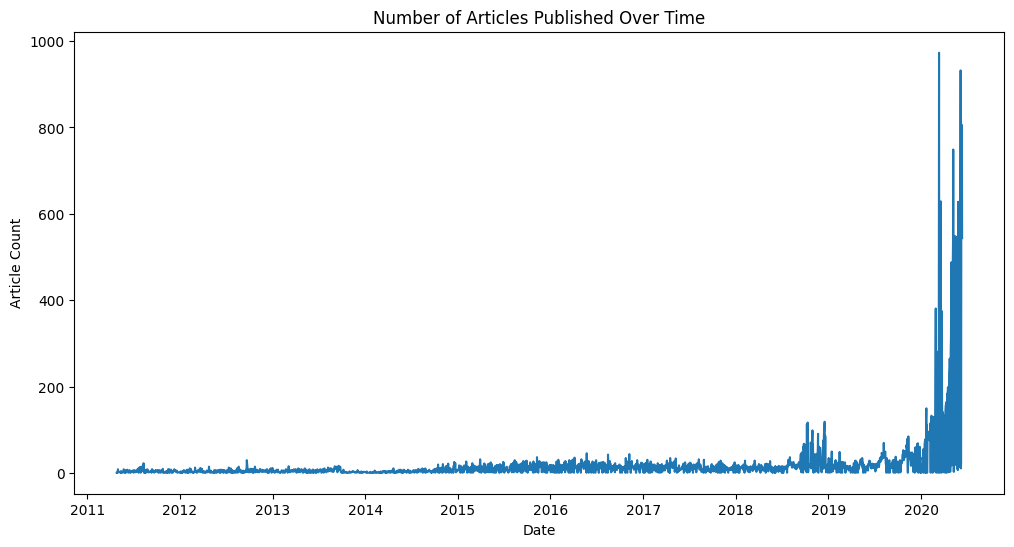

In [9]:
daily_counts.plot(kind='line', figsize=(12,6))
plt.title('Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Article Count')
plt.show()

### Text Analysis (Topic Modeling)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

documents = df['headline'].fillna('')

# TF-IDF Vectorizer with some basic preprocessing
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf = vectorizer.fit_transform(documents)

# NMF Topic modeling
num_topics = 5
nmf = NMF(n_components=num_topics, random_state=1)
nmf.fit(tfidf)

# Display topics
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topic #{topic_idx+1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))  # Top 10 words
    print()

Topic #1:
hit 52 week stocks lows thursday highs friday wednesday monday

Topic #2:
moving session stocks day mid pre market wednesday tuesday monday

Topic #3:
movers yesterday biggest set new low friday october 2018 52

Topic #4:
shares trading companies higher amid following optimism reopening economic lower

Topic #5:
target price maintains raises lowers buy neutral downgrades upgrades morgan



### Time Series Analysis

## Publication Frequency Over Time

In [11]:
import numpy as np

spikes = daily_counts[daily_counts > daily_counts.mean() + 2 * daily_counts.std()]
print("Spikes in article count on these dates:")
print(spikes)


Spikes in article count on these dates:
date_only
2020-02-27    275
2020-02-28    381
2020-03-06    281
2020-03-11    282
2020-03-12    973
2020-03-19    629
2020-03-23    375
2020-03-24    160
2020-04-09    164
2020-04-13    184
2020-04-15    186
2020-04-16    199
2020-04-17    194
2020-04-20    180
2020-04-21    233
2020-04-22    245
2020-04-23    265
2020-04-24    246
2020-04-27    283
2020-04-28    317
2020-04-29    449
2020-04-30    488
2020-05-01    385
2020-05-04    347
2020-05-05    478
2020-05-06    531
2020-05-07    749
2020-05-08    508
2020-05-11    485
2020-05-12    387
2020-05-13    549
2020-05-14    536
2020-05-15    322
2020-05-18    547
2020-05-19    332
2020-05-20    461
2020-05-21    333
2020-05-22    286
2020-05-26    628
2020-05-27    492
2020-05-28    465
2020-05-29    309
2020-06-01    484
2020-06-02    361
2020-06-03    720
2020-06-04    538
2020-06-05    932
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
dtype: int64


## Publishing Times Analysis

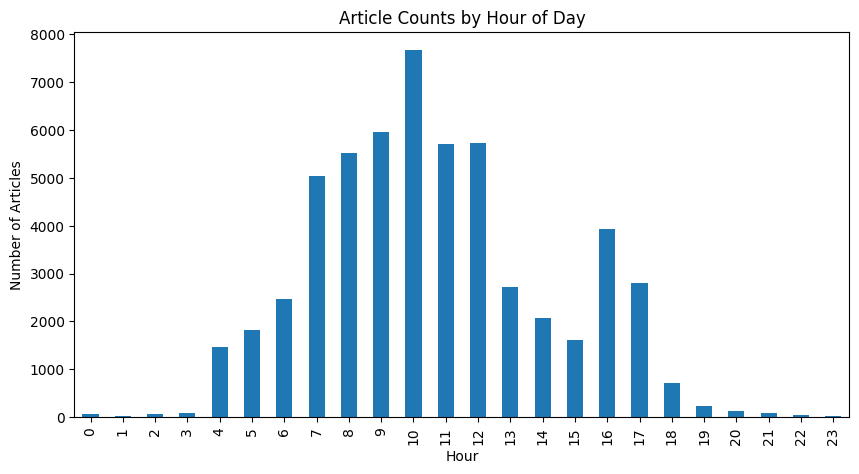

In [12]:
df['hour'] = df['date'].dt.hour
hourly_counts = df.groupby('hour').size()

hourly_counts.plot(kind='bar', figsize=(10,5))
plt.title('Article Counts by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Articles')
plt.show()


###  Publisher Analysis

##  Difference in Type of News by Publisher

In [13]:
publisher_headline_length = df.groupby('publisher')['headline_length'].mean().sort_values(ascending=False)
print(publisher_headline_length)


publisher
Benzinga Newsdesk        226.071766
Benzinga  Newsdesk       175.562500
Investor Ideas           122.000000
Othanas Economopoulos    115.000000
luke@benzinga.com        106.804428
                            ...    
Scout Finance             28.000000
Dave Wienke               27.000000
Tatro Capital             26.000000
Jane Sanders              25.000000
Spencer Purdy             25.000000
Name: headline_length, Length: 225, dtype: float64


## check keyword presence per publisher

In [14]:
df['mentions_price_target'] = df['headline'].str.contains('price target', case=False, na=False)
price_target_counts = df.groupby('publisher')['mentions_price_target'].sum().sort_values(ascending=False)
print(price_target_counts)


publisher
Vick Meyer                 1870
Benzinga_Newsdesk           936
vishwanath@benzinga.com     923
Benzinga Newsdesk           561
Lisa Levin                  152
                           ... 
Greg Troccoli                 0
Hannah Genig                  0
Hilary Farrell                0
Howard Lindzon                0
webmaster                     0
Name: mentions_price_target, Length: 225, dtype: int64


## Extract Domains From Email Publisher Names

In [15]:
import re

# Identify rows where publisher looks like email (simple regex)
df['publisher_domain'] = df['publisher'].apply(lambda x: re.search(r'@([\w.-]+)', x).group(1) if re.search(r'@([\w.-]+)', x) else None)

# Count domains
domain_counts = df['publisher_domain'].value_counts()
print(domain_counts)

publisher_domain
benzinga.com    1196
gmail.com          3
Name: count, dtype: int64
